In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/AI_LAB/Assignment-2/wdbc.csv', delimiter=',')

my_list = [list(row) for row in df.values]

#print(my_list[1][1])

M


In [ ]:
for D in my_list:
  if D[1] == 'M':
    D[1] = 1
  elif D[1] == 'B':
    D[1] = 0

import numpy as np
my_data2 = np.array(my_list)
my_data = my_data2[0:,1:]
#my_data

In [ ]:
from random import seed
import random

seed(1)

train_set = []
val_set = []
test_set = []
random.shuffle(my_data)
for S in my_data:
  value = random.random()
  if value>=0 and value<=0.7:
    train_set.append(S)
  elif value>=0.7 and value<=0.85:
    val_set.append(S)
  else:
    test_set.append(S)


In [1]:
theta = np.random.rand(30)
lr = .001
train_loss = []
for i in range(1000):
  tj = 0
  for T in train_set:
    x = T[1:]
    X = (x - np.min(x))/(np.max(x) - np.min(x))
    Z = np.dot(X, theta)
    h = 1/(1 + np.exp(-Z))
    y = T[0]
    j = - y * np.log(h) - (1 - y) * np.log(1 - h)
    tj = tj + j 
    dv = X*(h-y)
    theta = theta - dv*lr
  tj = tj / len(train_set)
  train_loss.append(tj)   

NameError: ignored

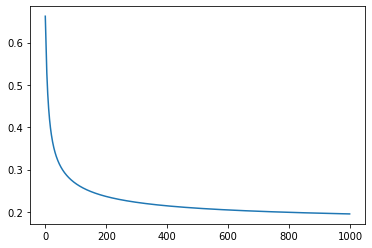

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(0, 1000, 1)
y = train_loss
plt.plot(x, y)

In [ ]:
correct = 0
for V in val_set:
  x = V[1:]
  X = (x - np.min(x))/(np.max(x) - np.min(x))
  Z = np.dot(X, theta)
  h = 1/(1 + np.exp(-Z))
  y = V[0]
  if h >= 0.5:
    h = 1
  else:
    h = 0
  
  if h == y:
    correct +=1
val_acc = (correct / len(val_set)) * 100 
print("Validation Accuracy")
print(val_acc)


Validation Accuracy
92.07920792079209


In [ ]:
correct = 0
for TE in test_set:
  x = TE[1:]
  X = (x - np.min(x))/(np.max(x) - np.min(x))
  Z = np.dot(X, theta)
  h = 1/(1 + np.exp(-Z))
  y = TE[0]
  if h >= 0.5:
    h = 1
  else:
    h = 0

  if h == y:
    correct +=1
test_acc = (correct / len(test_set)) * 100 
print("Test Accuracy")
print(test_acc)

Test Accuracy
90.42553191489363
